# Preliminary

Help

In [ ]:
# Documentation: https://ssc-datascience.github.io/
# https://medium.com/python-in-plain-english/scraping-tweets-with-tweepy-python-59413046e788
# https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1

In [ ]:
# Help: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

#!pip install tweepy # python client for the official Twitter API
#!pip install textblob # python library for processing textual data

Needed to create a Twitter Developer account

Packages loading

In [1]:
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
!pip install preprocessor
import preprocessor as p
import os
import time
import numpy as np
import nltk

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4478 sha256=e22c0b21a668737a9cd1cde0e3c3e4d0903814801424596007e514d3b6351233
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [2]:
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters using simple regex statements. 
        '''
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) # (@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|

# Data

In [3]:
# Twitter credentials
# Obtain them from your twitter developer account

consumer_key = "*****"
consumer_secret = "*****"

access_token = "*****"
access_token_secret = "*****"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
# Number of most recent tweets to be scraped

import datetime

count = 2000
startDate = datetime.datetime(2018, 1, 1, 0, 0, 0)
endDate = datetime.datetime(2020, 12, 31, 0, 0, 0)

In [5]:
username = 'Succes_MASRA'

try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username,tweet_mode='extended').items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, clean_tweet(tweet.full_text)] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 masra_tweets = pd.DataFrame(tweets_list)
 masra_tweets = masra_tweets[startDate < masra_tweets[0]]
 masra_tweets = masra_tweets[masra_tweets[0] < endDate]
 masra_tweets.columns = ['date','id','tweet']
except BaseException as e:
      # print error (if any) 
      print('failed on_status,',str(e))
      time.sleep(3)

In [6]:
username = 'saleh_kebzabo'

try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username,tweet_mode='extended').items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, clean_tweet(tweet.full_text)] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 kebzabo_tweets = pd.DataFrame(tweets_list)
 kebzabo_tweets = kebzabo_tweets[startDate < kebzabo_tweets[0]]
 kebzabo_tweets = kebzabo_tweets[kebzabo_tweets[0] < endDate]
 kebzabo_tweets.columns = ['date','id','tweet']
except BaseException as e:
      # print error (if any) 
      print('failed on_status,',str(e))
      time.sleep(3)

#Sentiment analysis

In [ ]:
!pip install textblob_fr
from textblob_fr import PatternTagger, PatternAnalyzer

Simple sentiment analysis

In [31]:
masra_sentiment = pd.DataFrame([TextBlob(text=masra_tweets['tweet'][i], pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment for i in range(len(masra_tweets))])
masra_sentiment.columns = ['polarity', 'subjectivity'] # polarity,subjectivity
masra_sentiment['date_truncated'] = [masra_tweets['date'][i].date() for i in range(len(masra_tweets))]

kebzabo_sentiment = pd.DataFrame([TextBlob(text=kebzabo_tweets['tweet'][i], pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment for i in range(len(kebzabo_tweets))])
kebzabo_sentiment.columns = ['polarity', 'subjectivity'] # polarity,subjectivity
kebzabo_sentiment['date_truncated'] = [kebzabo_tweets['date'][i].date() for i in range(len(kebzabo_tweets))]

Text(0, 0.5, 'Polarity sore')

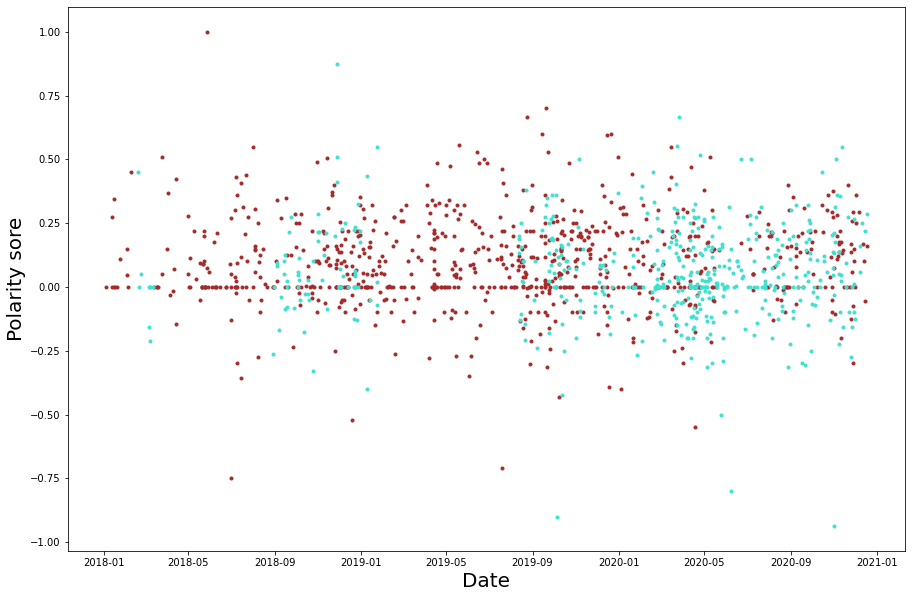

In [32]:
mycolors = ['brown','turquoise']

import matplotlib.pyplot as plt #for plotting

plt.figure(figsize=(15,10))
#plt.xlim(0,max(len(masra_tweets[0]),len(kebzabo_tweets[0])))

plt.plot(masra_sentiment['date_truncated'],masra_sentiment["polarity"],'.',color = mycolors[0],label='masra')
plt.plot(kebzabo_sentiment['date_truncated'],kebzabo_sentiment["polarity"],'.',color = mycolors[1],label='kebzabo')

#plt.stackplot(range(len(year)),participations, colors = mycolors, labels=name[african_participant])

#plt.yticks(np.arange(0,sum(np.max(participations,axis=1)),15),fontsize=15)
#plt.xticks(np.arange(1,len(year),3),year[np.arange(1,len(year),3)][::-1],fontsize=15)

#plt.legend(loc='upper left',fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Polarity sore',fontsize=20)

In [33]:
# x-axis = number of words, y-axis = frequency/density 
# (example: Graph 2 and 3 at https://www.analyticsvidhya.com/blog/2020/11/fine-grained-sentiment-analysis-of-smartphone-review/)

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
masra_sentiment['nb words'] = [len(TextBlob(masra_tweets['tweet'][i]).words) for i in range(len(masra_tweets['tweet']))]
kebzabo_sentiment['nb words'] = [len(TextBlob(kebzabo_tweets['tweet'][i]).words) for i in range(len(kebzabo_tweets['tweet']))]

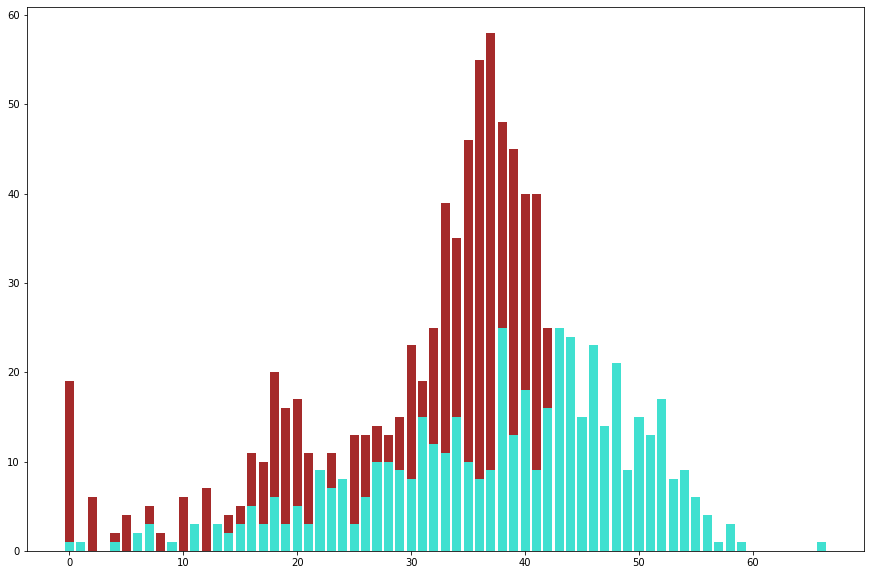

In [35]:
plt.figure(figsize=(15,10))

u, inv = np.unique(masra_sentiment['nb words'], return_inverse=True)
counts = np.bincount(inv)
plt.bar(u, counts, color = mycolors[0],label='masra')

u, inv = np.unique(kebzabo_sentiment['nb words'], return_inverse=True)
counts = np.bincount(inv)
plt.bar(u, counts,color = mycolors[1],label='kebzabo')

plt.show()

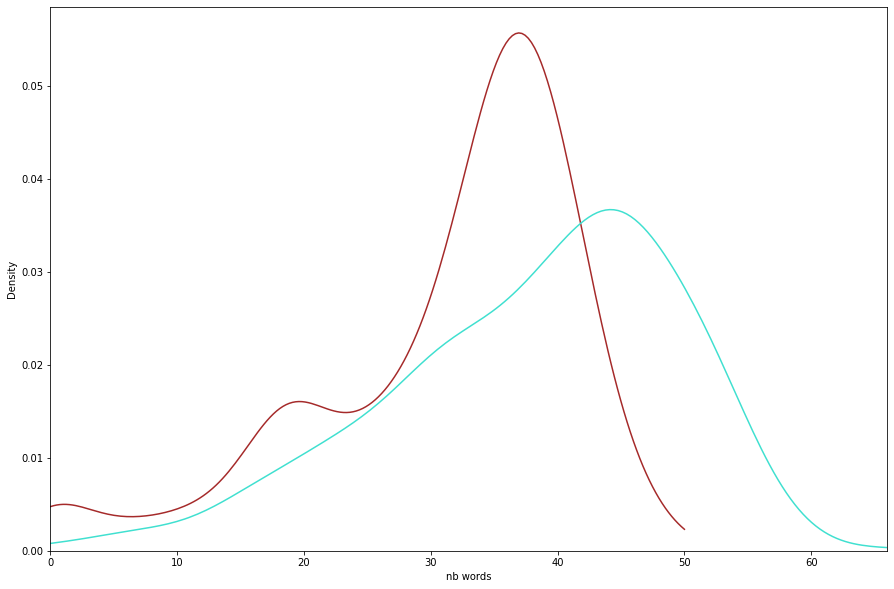

In [36]:
# Density plot

import seaborn as sns

plt.figure(figsize=(15,10))
Xlim = (0,max(max(masra_sentiment['nb words']),max(kebzabo_sentiment['nb words'])))

sns.kdeplot(masra_sentiment['nb words'],cut=0,color=mycolors[0]).set(xlim=Xlim)
sns.kdeplot(kebzabo_sentiment['nb words'],cut=0,color=mycolors[1]).set(xlim=Xlim)

plt.show()

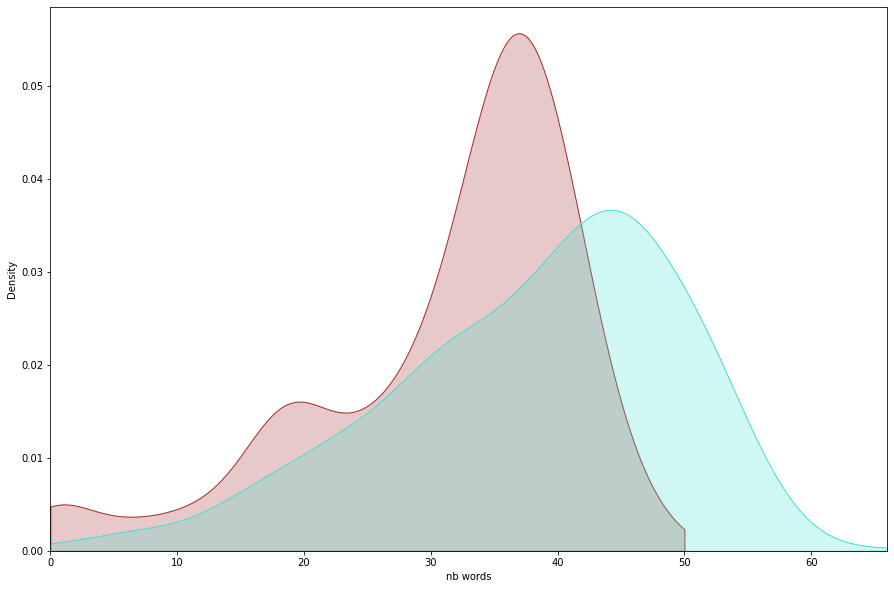

In [44]:
# Density plot

import seaborn as sns

plt.figure(figsize=(15,10))

Xlim = (0,max(max(masra_sentiment['nb words']),max(kebzabo_sentiment['nb words'])))

sns.kdeplot(
   masra_sentiment['nb words'],cut=0,color=mycolors[0],
   fill=True, common_norm=False, palette="crest"
).set(xlim=Xlim)

sns.kdeplot(
   kebzabo_sentiment['nb words'],cut=0,color=mycolors[1],
   fill=True, common_norm=False, palette="crest"
).set(xlim=Xlim)

plt.show()

Sentiment analysis using bigrams

Chi-square test on type of sentiment between tweets from Masra and Kebzabo

#LDA